## Model Development

Import libraries

In [14]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

sns.set_style(style = 'whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [15]:
df = pickle.load(open("../assets/clean_df.pkl", "rb"))
df.head()

,hazardous,epoch_cal,eccentricity_(e),semi_major_axis_(a),perihelion_dist_(q),inclination_(i),perihelion_arg_(w),abs_magnitude_(H),mean_anomaly,aphelion_dist_(Q),...,asc_node_long_(deg),orbital_per_(y),first_obs,last_obs,class_APO,class_ATE,class_IEO,stand_grav_param,rel_velocity_Q,rel_velocity_q
0,0,20200531.0,0.222951,1.458046,1.132973,10.830543,178.882294,10.4,271.071732,1.783119,...,304.299327,1.760617,1893-10-29,2019-02-13,0,0,0,13.866566,11.661046,18.352633
1,0,20200531.0,0.546558,2.638602,1.196452,11.567485,156.176338,15.4,140.273422,4.080752,...,183.866950,4.286167,1911-10-04,2020-02-27,0,0,0,82.182090,14.335015,48.892609
2,0,20200531.0,0.570332,2.473737,1.062886,9.393854,350.495585,13.8,294.579157,3.884588,...,110.434218,3.890796,1918-02-03,2019-08-27,0,0,0,67.719856,12.982886,47.449251
3,0,20200531.0,0.533046,2.664725,1.244303,26.677643,132.364631,9.4,4.817745,4.085146,...,215.546826,4.349974,1924-10-23,2019-08-17,0,0,0,84.647180,14.755655,48.443972
4,0,20200531.0,0.435285,1.919498,1.083970,11.876536,26.694797,17.7,38.522409,2.755027,...,171.326998,2.659437,1932-03-12,2020-01-24,0,0,0,31.638696,12.080367,30.703567


In [16]:
df.shape

(2917, 23)

In [17]:
df.isnull().sum()

hazardous                      0
epoch_cal                      0
eccentricity_(e)               0
semi_major_axis_(a)            0
perihelion_dist_(q)            0
inclination_(i)                0
perihelion_arg_(w)             0
abs_magnitude_(H)              0
mean_anomaly                   0
aphelion_dist_(Q)              0
mean_motion_(n)                0
min_orbit_intersection_dist    0
t_jupiter                      0
asc_node_long_(deg)            0
orbital_per_(y)                0
first_obs                      0
last_obs                       0
class_APO                      0
class_ATE                      0
class_IEO                      0
stand_grav_param               0
rel_velocity_Q                 0
rel_velocity_q                 0
dtype: int64

In [18]:
c = ['#B275FF', '#757DFF', '#5E3BA8', '#503098', '#41258A', '#251C65']

### Baseline Accuracy

Based on the class distribution, the baseline accuracy score is about 74%. The baselines suggests that if we randomly select an observation, then there is a 74% chance that the asteroid selected is accurately classified as not hazardous.

In [19]:
df['hazardous'].value_counts(normalize=True)

0    0.737744
1    0.262256
Name: hazardous, dtype: float64

### Model Prep: Create `X` and `y` variables

In [20]:
# Assign features to a variable
features = df.describe().columns

# Create X and y
X = df[features].drop(columns='hazardous')
y = df['hazardous']

### Train/Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

Standardizes data (since there are various types of units in the dataset)

In [22]:
# Instantiate Standard Scalar
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Logistic Regression Model

In [23]:
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train_sc, y_train)

print(f'Logistic Regression Intercept: \n{logreg_model.intercept_}\n')

print(f'Logistic Regression Coefficient: \n{logreg_model.coef_}\n')

print(f'Logistic Regression predicted values: \n{logreg_model.predict(X_train_sc)}\n')

print(f'Logistic Regression predicted probabilities: \n{logreg_model.predict_proba(X_train_sc)}\n')

Logistic Regression Intercept: 
[-7.52970905]

Logistic Regression Coefficient: 
[[ 0.05382308  0.49291955 -0.10144542  0.29991149  0.03866579  0.01286364
  -0.21724348  0.02415867 -0.19723761  0.11046118 -9.20714427  0.0354981
   0.05013064 -0.05031619  0.26311662  0.08074522  0.18532951  0.2567638
   0.12203394 -0.19737769]]

Logistic Regression predicted values: 
[0 0 0 ... 0 0 1]

Logistic Regression predicted probabilities: 
[[9.98782126e-01 1.21787412e-03]
 [9.99999545e-01 4.54791241e-07]
 [1.00000000e+00 2.02061346e-10]
 ...
 [9.99327300e-01 6.72700403e-04]
 [9.99411840e-01 5.88160054e-04]
 [1.81380040e-01 8.18619960e-01]]



In [24]:
logreg_preds = logreg_model.predict(X_train_sc)

In [28]:
print(f'Logistic Regression Accuracy Score: {logreg_model.score(X_test_sc, y_test)}')

Logistic Regression Accuracy Score: 0.9767123287671233


Find `f1_score` because classes are unbalanced. 

In [33]:
y_pred = logreg_model.predict(X_test_sc)

print(f'Logistic Regression F1 Score: {f1_score(y_pred, y_test)}')

Logistic Regression F1 Score: 0.9565217391304348


In [34]:
np.exp(logreg_model.coef_)

# Match coeffecients to their corresponding feature
for i in range(len(X.columns)):
    print(f'{X.columns[i]}: {np.exp(logreg_model.coef_[0][i])}')

epoch_cal: 1.0552978854003778
eccentricity_(e): 1.6370888130847252
semi_major_axis_(a): 0.9035304938780752
perihelion_dist_(q): 1.349739340553079
inclination_(i): 1.039423043918961
perihelion_arg_(w): 1.012946731377646
abs_magnitude_(H): 0.8047340064911802
mean_anomaly: 1.0244528549537273
aphelion_dist_(Q): 0.8209955370597167
mean_motion_(n): 1.1167929976090902
min_orbit_intersection_dist: 0.00010032012136499794
t_jupiter: 1.0361356828984296
asc_node_long_(deg): 1.0514084418467875
orbital_per_(y): 0.9509287050679176
class_APO: 1.300978424428291
class_ATE: 1.0840946610614453
class_IEO: 1.203614977495742
stand_grav_param: 1.292739748770093
rel_velocity_Q: 1.1297924471957466
rel_velocity_q: 0.8208805390312289


**Interpretation for one coefficient**
As Standard Gravitational Parameter increases by 1, an asteroid is about 1.29 times as likely to be hazardous.

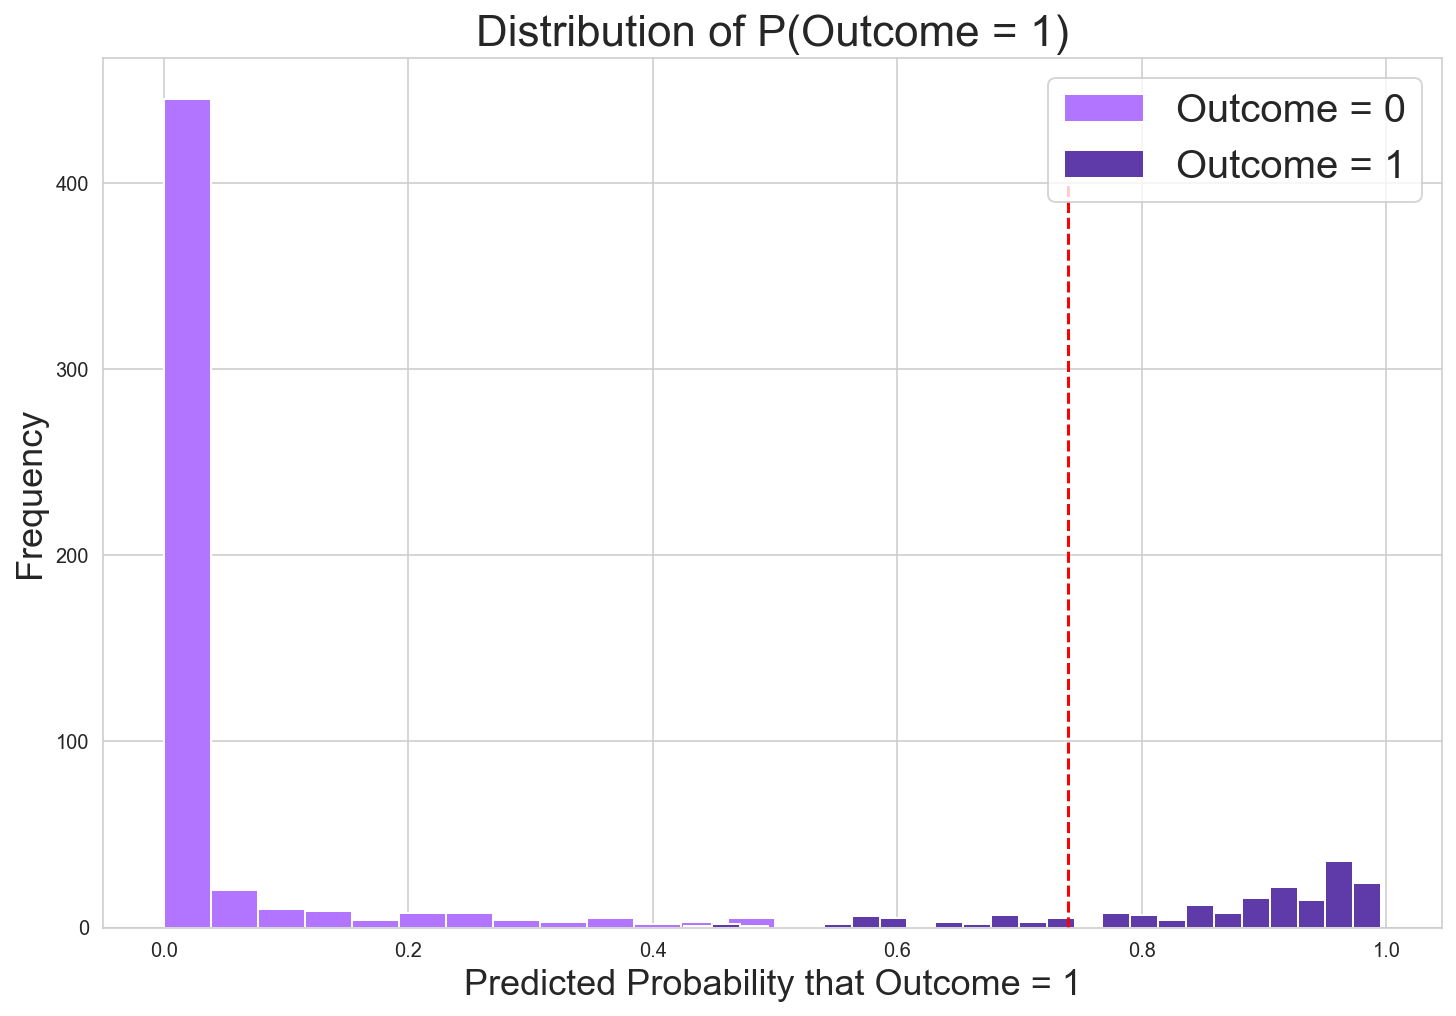

In [25]:
# Create a dataframe called logreg_preds_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

logreg_pred_proba = [i[1] for i in logreg_model.predict_proba(X_test_sc)]

logreg_preds_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': logreg_pred_proba})

# Graph from Lesson 4.04
# Create figure.
plt.figure(figsize = (12,8))

# Create two histograms of observations.
plt.hist(logreg_preds_df[logreg_preds_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color=c[0],
         label='Outcome = 0')
plt.hist(logreg_preds_df[logreg_preds_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color=c[2],
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.097
plt.vlines(x=0.74,
           ymin = 0,
           ymax = 400,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);
plt.savefig('../images/dist_outcome1.png');

In [46]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC.
roc_auc_score(logreg_preds_df['true_values'], 
             logreg_preds_df['pred_probs'])

0.9915977814257545

### KNN Model

In [35]:
# Instantiate KNN
knn_model = KNeighborsClassifier()

knn_model.fit(X_train_sc, y_train)
print(f'KNN Train Accuracy Score:\n{knn_model.score(X_train_sc, y_train)}\n')

print(f'KNN Test Accuracy Score:\n{knn_model.score(X_test_sc, y_test)}\n')

knn_preds = knn_model.predict(X_test_sc)

KNN Train Accuracy Score:
0.9062642889803384

KNN Test Accuracy Score:
0.8561643835616438



**Confusion Matrix**  

**TP**: Predict an asteroid is positive and actually is positive.  
**TN**:  Predict an asteroid is negative and actually is negative.  
**FP**: Predict an asteroid is hazardous, but actually is not hazardous.    
**FN**: Predict an astereois is not hazardous but actually is hazardous

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_preds).ravel()

# What is the test specificity of the model?
spec = tn / (tn + fp)
print(f'Specificity: {round(spec,4)}')

# What is the test sensitivity of the model?
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens,4)}')

Specificity: 0.9054
Sensitivity: 0.7173


In [39]:
print(f'KNN Test F1 Score:\n{f1_score(knn_preds, y_test)}')

KNN Test F1 Score:
0.7229551451187336


### Support Vector Classifier

In [40]:
# Instantiate SVM.
svc = SVC(
    C = 100,
    kernel = "rbf",
    gamma = "scale"
)

# Fit on training data.
print(f'SVC Train Score:\n{svc.fit(X_train_sc, y_train)}\n')

# Evaluate model.
print(f'{svc.score(X_test_sc, y_test)}')

SVC Train Score:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.963013698630137


### Decision Tree Classifier

In [41]:
# Instantiate Grid Search to 
dt_gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_grid={
                       'max_depth': [3, 5, 7, 10],
                       'min_samples_split': [5, 10, 15, 20],
                       'min_samples_leaf': [2, 3, 4, 5, 6, 7]
                   },
                   cv=5)

dt_gs.fit(X_train_sc, y_train)

# What is our best decision tree?
print(f'DT Best Params:\n{dt_gs.best_params_}')

DT Best Params:
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [42]:
# Instantiate model with best parameters.
dt_best_model = dt_gs.estimator

# Fit model.
dt_best_model.fit(X_train_sc, y_train)

# Evaluate model.
print(f'DT Train Score:\n{dt_best_model.score(X_train_sc, y_train)}\n')
print(f'DT Test Score:\n{dt_best_model.score(X_test_sc, y_test)}\n')

DT Train Score:
1.0

DT Test Score:
0.9972602739726028



### Bagging Classifier

In [43]:
# Instantiate BaggingClassifier.
bag_model = BaggingClassifier(random_state=42)

# Fit BaggingClassifier.
bag_model.fit(X_train_sc, y_train)

# Score BaggingClassifier.
print(f'Bagging Train Score:\n{bag_model.score(X_train_sc, y_train)}\n')
print(f'Bagging Train Score:\n {bag_model.score(X_test_sc, y_test)}')

Bagging Train Score:
1.0

Bagging Train Score:
 0.9972602739726028


### Random Forest Classifier

In [44]:
# Instantiate RandomForest
rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 125],
    'max_depth': [None, 4, 5, 6],
    'max_features': [None, 
                     'auto']
}
rf_gs = GridSearchCV(rf_model, param_grid=rf_params, cv=5)
rf_gs.fit(X_train, y_train)
print(rf_gs.best_score_) # cross val score from the best set of parameters
rf_gs.best_params_

0.9995427526291724


{'max_depth': None, 'max_features': None, 'n_estimators': 100}

In [45]:
# Instantiate the best model
rf_best_model = rf_gs.best_estimator_

# Fit model
rf_best_model.fit(X_train_sc, y_train)

# Evaluate model.
print(f'RF Train Score:\n{rf_best_model.score(X_train_sc, y_train)}\n')
print(f'RF Test Score:\n{rf_best_model.score(X_test_sc, y_test)}\n')

RF Train Score:
1.0

RF Test Score:
0.9972602739726028



In [46]:
rf_best_model.feature_importances_

array([0.00000000e+00, 1.56948018e-05, 6.60003307e-05, 2.29123596e-05,
       1.63297581e-04, 1.60399216e-05, 3.86972739e-02, 2.32501420e-04,
       7.15955713e-05, 2.20187090e-04, 9.59476354e-01, 4.51946882e-04,
       0.00000000e+00, 2.99353197e-04, 1.88337621e-05, 0.00000000e+00,
       0.00000000e+00, 1.54458665e-04, 9.35504965e-05, 0.00000000e+00])

In [47]:
# Match coeffecients to their corresponding feature
for i in range(len(X.columns)):
    print(f'{X.columns[i]}: {rf_best_model.feature_importances_[i]}')

epoch_cal: 0.0
eccentricity_(e): 1.5694801769701933e-05
semi_major_axis_(a): 6.60003306930737e-05
perihelion_dist_(q): 2.291235961334303e-05
inclination_(i): 0.00016329758093923226
perihelion_arg_(w): 1.60399215826056e-05
abs_magnitude_(H): 0.038697273855215805
mean_anomaly: 0.00023250142032384615
aphelion_dist_(Q): 7.15955713068366e-05
mean_motion_(n): 0.0002201870901919494
min_orbit_intersection_dist: 0.9594763540654211
t_jupiter: 0.0004519468816607548
asc_node_long_(deg): 0.0
orbital_per_(y): 0.0002993531971778961
class_APO: 1.8833762123642313e-05
class_ATE: 0.0
class_IEO: 0.0
stand_grav_param: 0.00015445866545275836
rel_velocity_Q: 9.355049652748532e-05
rel_velocity_q: 0.0


Create a data frame for the best model and plot the features.

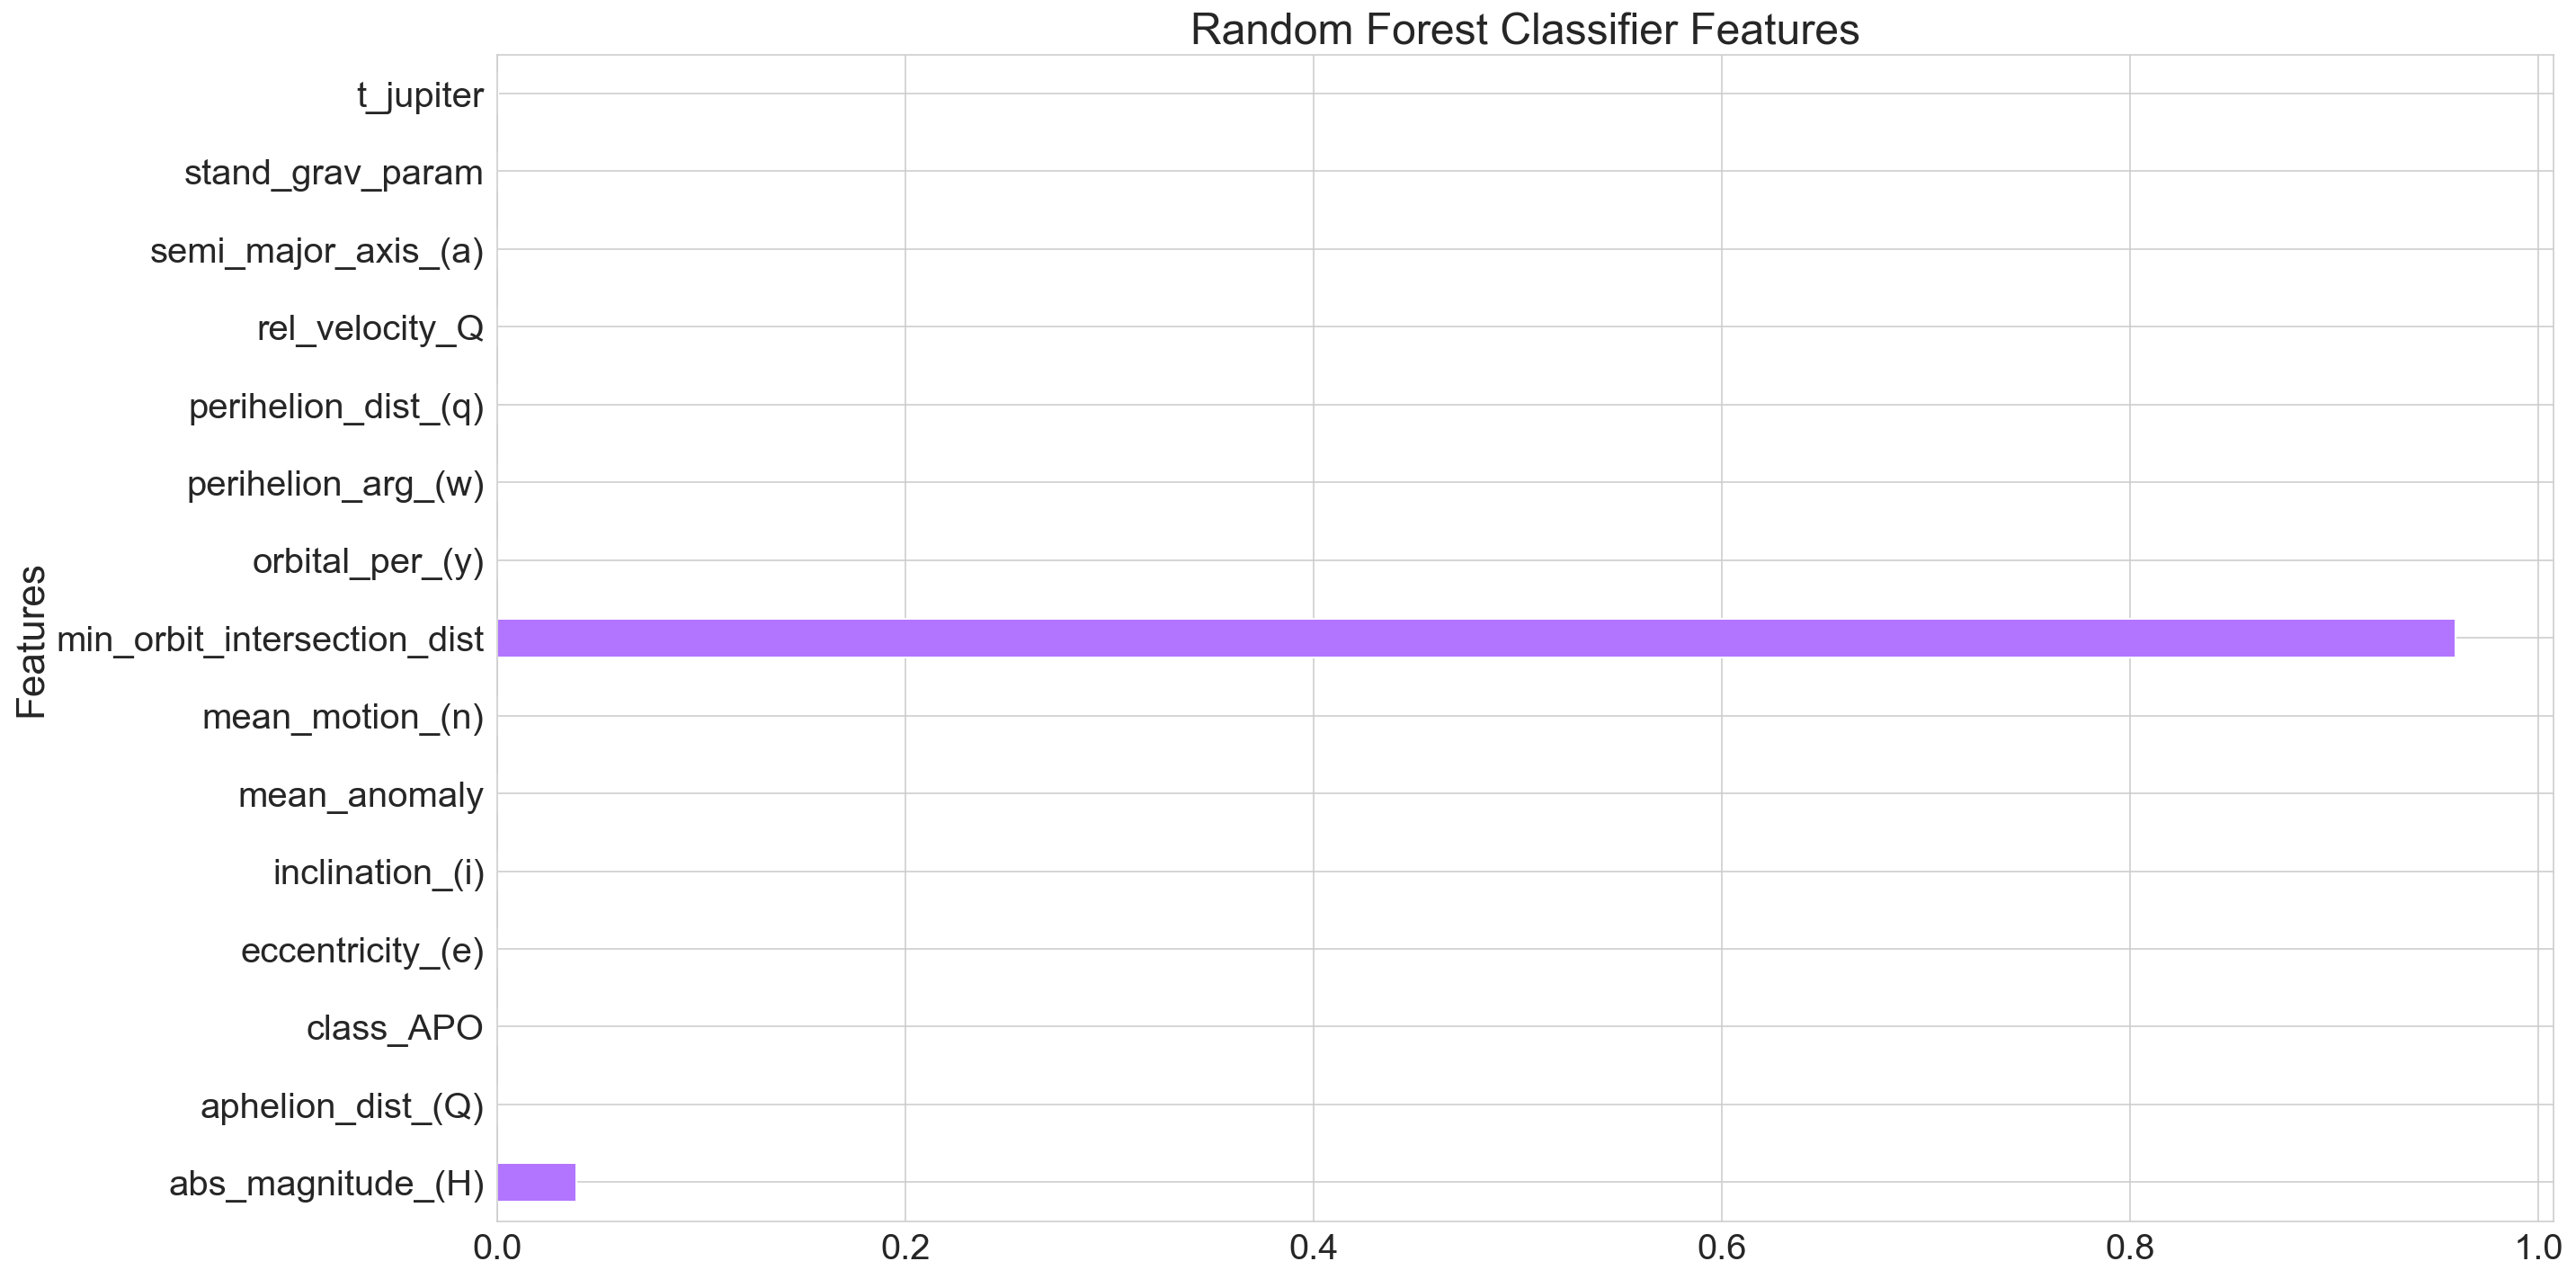

In [48]:
# look at the coefficients
coefs = rf_best_model.feature_importances_
features = X.columns

dict(zip(coefs, features));
features_df = pd.DataFrame({'features': features,
             'coefficients': coefs
                         })

features_df = features_df[features_df['coefficients'] > 0]

plt.figure(figsize=(20,10))
features_df.groupby('features')['coefficients'].sum().plot(kind='barh', color=c[0])
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Features', fontsize=22)
plt.title('Random Forest Classifier Features', fontsize=24)
plt.tight_layout()
plt.savefig('../images/features.png')

### Model Evaluation

While all of the models performed very well, the baseline score was 74% to begin with because the classes were highly unbalanced. All models performed better than the baseline, but the one that performed the best is Random Forest Classifier with 99.7% accuracy. Although Logistic Regression scored a 97.6% accuracy, which is about 2% lower than the Random Forest Classifier model, I would choose Logistic Regression over RFC because of the interpretability tradeoff. Because our classes were so uncbalanced, the F1 Score for all model's is a better metric than Accuracy Score. Logistic Regression had an F1 Score of 95.7%, which is a the metric we are trying to optimize. When graphing the features for the RFC model, the features "min orbit intersection distance" and "absolute magnitude" carry most of the weight of the predictions and not much else can be said about the rest of the features. For LogReg, we can we how likely it for an asteroid to be hazardous given a 1 unit increase in a feature.

### Conclusion
Asteroids orbital features are fascinating, but it was unfortunate that the target class was highly unbalanced because it takes meaning away from the accuracy of the model. According to the best model, most influential feature is the distance from the orbit of intersection, which was obvious from the beginning. The collecting more data would be ideal, but we can't create more hazardous asteroids than are in existence – and ideally, we would want there to be none. I could do more research on other features that can be influential that were not included in this dataset and gather more data that way.